In [66]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import mpld3
mpld3.enable_notebook()

from matplotlib.finance import candlestick2_ochl
# candelstick_ohlc
import matplotlib.dates as mdates
# from pandas_datareader import data as web

In [15]:
style.use('ggplot')


In [41]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = web.DataReader("TSLA", 'morningstar', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)

print(df.head())

             Close    High       Low    Open   Volume
Date                                                 
2015-01-01  222.41  222.41  222.4100  222.41        0
2015-01-02  219.31  223.25  213.2600  222.63  4764443
2015-01-05  210.09  216.50  207.1626  214.50  5368477
2015-01-06  211.28  214.20  204.2100  210.06  6261936
2015-01-07  210.95  214.78  209.7800  213.40  2968390


# Basic stock data manipulation

In [27]:
df.to_csv("tesla.csv")

In [29]:
df =pd.read_csv('tesla.csv',parse_dates=True,index_col=0)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,222.41,222.41,222.4100,222.41,0
2015-01-02,219.31,223.25,213.2600,222.63,4764443
2015-01-05,210.09,216.50,207.1626,214.50,5368477
2015-01-06,211.28,214.20,204.2100,210.06,6261936
2015-01-07,210.95,214.78,209.7800,213.40,2968390


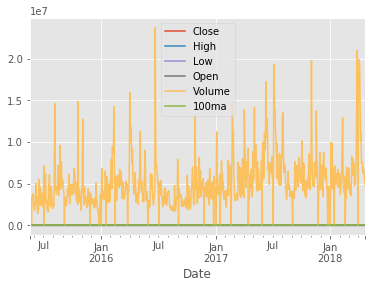

In [50]:
df.plot()
plt.show()

In [45]:
df['100ma'] = df['Close'].rolling(window=100,min_periods=0).mean()
# df.dropna(inplace=True)
df.head()

,Close,High,Low,Open,Volume,100ma
Date,,,,,,
2015-05-20,244.350,247.74,241.3721,247.12,3755569,244.3500
2015-05-21,245.620,246.62,242.3574,243.17,1970643,244.9850
2015-05-22,247.730,248.60,245.0100,245.38,2223089,245.9000
2015-05-25,247.730,247.73,247.7300,247.73,0,246.3575
2015-05-26,247.455,252.00,246.5000,247.68,3498682,246.5770


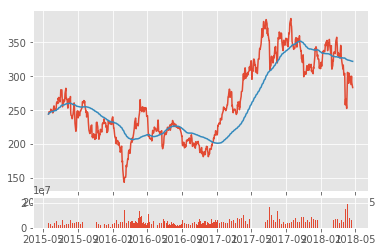

In [51]:
ax1 =plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(df.index,df['Close'])
ax1.plot(df.index,df['100ma'])

ax2.bar(df.index,df['Volume'])

plt.show()


# More Stock Manipulation

In [55]:
df_ohlc = df['Close'].resample('10D').ohlc()
df_volume =df['Volume'].resample('10D').sum()

print(df_ohlc.head())

              open    high     low   close
Date                                      
2015-05-20  244.35  251.45  244.35  250.80
2015-05-30  249.45  256.29  245.92  256.29
2015-06-09  256.00  261.89  250.38  261.89
2015-06-19  262.51  268.79  259.79  267.09
2015-06-29  262.02  280.02  254.96  254.96


In [59]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,index,Date,open,high,low,close
0,0,2015-05-20,244.35,251.45,244.35,250.80
1,1,2015-05-30,249.45,256.29,245.92,256.29
2,2,2015-06-09,256.00,261.89,250.38,261.89
3,3,2015-06-19,262.51,268.79,259.79,267.09
4,4,2015-06-29,262.02,280.02,254.96,254.96


In [71]:
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)


AttributeError: 'float' object has no attribute 'toordinal'